# Supermart Grocery Sales — EDA, Visuals & Simple ML
**Author:** Deepika Priya K

**Short goal:** EDA → Visuals → small ML model to predict profit (explain log transform).


In [109]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# Load dataset with proper date parsing and data types
DATA_PATH = 'Supermart Grocery Sales - Retail Analytics Dataset.csv'

parse_dates = ['Order Date']
dtype = {'Order ID': 'string','Customer Name': 'string','Category': 'string','Sub Category': 'string','City': 'string','Region': 'string','Sales': 'float64',
    'Discount': 'float64','Profit': 'float64','State': 'string',}

df = pd.read_csv(DATA_PATH,parse_dates=parse_dates,dtype=dtype,low_memory=False)

In [111]:
# Show first 5 rows
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254.0,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749.0,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360.0,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896.0,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355.0,0.26,918.45,Tamil Nadu


In [112]:
# Check dataset structure, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   string 
 1   Customer Name  9994 non-null   string 
 2   Category       9994 non-null   string 
 3   Sub Category   9994 non-null   string 
 4   City           9994 non-null   string 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   string 
 7   Sales          9994 non-null   float64
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   string 
dtypes: float64(3), object(1), string(7)
memory usage: 859.0+ KB


In [113]:
# Summary statistics for both numeric and categorical columns
df.describe(include = 'all')

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
count,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994
unique,9994,50,7,23,24,1236,5,NaN,NaN,NaN,1
top,OD11,Amrish,Snacks,Health Drinks,Kanyakumari,09-05-2017,West,NaN,NaN,NaN,Tamil Nadu
freq,1,227,1514,719,459,38,3203,NaN,NaN,NaN,9994
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1496.596158,0.226817,374.937082,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,577.559036,0.074636,239.932881,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,0.100000,25.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,0.160000,180.022500,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1498.000000,0.230000,320.780000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.750000,0.290000,525.627500,NaN


In [114]:
# Check number of rows and columns in the dataset
df.shape

(9994, 11)

In [115]:
# 3.Data Preprocessing
# Check for missing values in each column
df.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [116]:
# Check and remove duplicate rows
duplicates_before = df.duplicated().sum()
print("Duplicate rows before removal:", duplicates_before)

df.drop_duplicates(inplace=True)

duplicates_after = df.duplicated().sum()
print("Duplicate rows after removal:", duplicates_after)

Duplicate rows before removal: 0
Duplicate rows after removal: 0


In [117]:
# Clean column names: remove spaces, replace with underscores, convert to lowercase
df.columns = [i.strip().replace(' ','_').lower() for i in df.columns]
df.columns

Index(['order_id', 'customer_name', 'category', 'sub_category', 'city',
       'order_date', 'region', 'sales', 'discount', 'profit', 'state'],
      dtype='object')

In [118]:
# Show the order_date column
df['order_date']

,order_date
0,11-08-2017
1,11-08-2017
2,06-12-2017
3,10-11-2016
4,10-11-2016
...,...
9989,12/24/2015
9990,07-12-2015
9991,06-06-2017
9992,10/16/2018


In [119]:
# Order Date column contained mixed formats (DD-MM-YYYY and MM/DD/YYYY).
# Applied conditional parsing based on separator type to correctly standardize all dates.
# Invalid entries converted to NaT.

# Create a new column to store the corrected dates
df['order_date_fixed'] = pd.NaT

# Convert rows with '-' (likely DD-MM-YYYY)
mask_dash = df['order_date'].str.contains('-', na=False)
df.loc[mask_dash, 'order_date_fixed'] = pd.to_datetime(df.loc[mask_dash, 'order_date'], dayfirst=True, errors='coerce')

# Convert rows with '/' (likely MM/DD/YYYY)
mask_slash = df['order_date'].str.contains('/', na=False)
df.loc[mask_slash, 'order_date_fixed'] = pd.to_datetime(df.loc[mask_slash, 'order_date'], dayfirst=False, errors='coerce')

In [120]:
# Check if any rows still have missing/invalid dates after fixing
df[df['order_date'].isnull()]

,order_id,customer_name,category,sub_category,city,order_date,region,sales,discount,profit,state,order_date_fixed


In [121]:
# Preview corrected date values
df['order_date_fixed']

,order_date_fixed
0,2017-08-11
1,2017-08-11
2,2017-12-06
3,2016-11-10
4,2016-11-10
...,...
9989,2015-12-24
9990,2015-12-07
9991,2017-06-06
9992,2018-10-16


In [122]:
# Replace original date column with cleaned dates and remove temporary column
df['order_date'] = df['order_date_fixed']
df.drop(columns='order_date_fixed', inplace=True)

# Show the final cleaned date column
df['order_date']

,order_date
0,2017-08-11
1,2017-08-11
2,2017-12-06
3,2016-11-10
4,2016-11-10
...,...
9989,2015-12-24
9990,2015-12-07
9991,2017-06-06
9992,2018-10-16


In [123]:
# Count rows where the date is still missing after fixing
df['order_date'].isnull().sum()

np.int64(0)

In [124]:
# Check the data types of all columns after cleaning
print(df.dtypes)

order_id         string[python]
customer_name    string[python]
category         string[python]
sub_category     string[python]
city             string[python]
order_date       datetime64[ns]
region           string[python]
sales                   float64
discount                float64
profit                  float64
state            string[python]
dtype: object


In [125]:
# Check if Sales, Discount, and Profit columns contain correct numeric types
df[['sales', 'discount', 'profit']].applymap(type).head()

/tmp/ipython-input-2684598310.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['sales', 'discount', 'profit']].applymap(type).head()


,sales,discount,profit
0,<class 'float'>,<class 'float'>,<class 'float'>
1,<class 'float'>,<class 'float'>,<class 'float'>
2,<class 'float'>,<class 'float'>,<class 'float'>
3,<class 'float'>,<class 'float'>,<class 'float'>
4,<class 'float'>,<class 'float'>,<class 'float'>


In [126]:
# Check for missing values in numeric columns
df[['sales','discount','profit']].isnull().sum()

,0
sales,0
discount,0
profit,0


In [127]:
# Create useful date-based features for analysis and modeling
df['year'] = df['order_date'].dt.year
df['month_no'] = df['order_date'].dt.month
df['month'] = df['order_date'].dt.month_name()
df['day'] = df['order_date'].dt.day
df['weekday'] = df['order_date'].dt.day_name()
df['quarter'] = df['order_date'].dt.quarter
df['order_month_year'] = df['order_date'].dt.to_period('M').astype(str)

# Preview the newly added columns
df[['year', 'month_no', 'month', 'day', 'weekday', 'quarter', 'order_month_year']].head()

,year,month_no,month,day,weekday,quarter,order_month_year
0,2017,8,August,11,Friday,3,2017-08
1,2017,8,August,11,Friday,3,2017-08
2,2017,12,December,6,Wednesday,4,2017-12
3,2016,11,November,10,Thursday,4,2016-11
4,2016,11,November,10,Thursday,4,2016-11


# EDA (Exploratory Data Analysis)

In [128]:
# EDA: Check dataset size (rows, columns)
df.shape

(9994, 18)

In [129]:
# EDA: View all column names after preprocessing
df.columns

Index(['order_id', 'customer_name', 'category', 'sub_category', 'city',
       'order_date', 'region', 'sales', 'discount', 'profit', 'state', 'year',
       'month_no', 'month', 'day', 'weekday', 'quarter', 'order_month_year'],
      dtype='object')

In [130]:
df.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sales,discount,profit,state,year,month_no,month,day,weekday,quarter,order_month_year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254.0,0.12,401.28,Tamil Nadu,2017,8,August,11,Friday,3,2017-08
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749.0,0.18,149.80,Tamil Nadu,2017,8,August,11,Friday,3,2017-08
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360.0,0.21,165.20,Tamil Nadu,2017,12,December,6,Wednesday,4,2017-12
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896.0,0.25,89.60,Tamil Nadu,2016,11,November,10,Thursday,4,2016-11
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355.0,0.26,918.45,Tamil Nadu,2016,11,November,10,Thursday,4,2016-11


In [131]:
# Create a readable discount percentage column
df['discount_percent'] = df['discount'] * 100

# Preview updated dataset
df.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sales,discount,profit,state,year,month_no,month,day,weekday,quarter,order_month_year,discount_percent
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254.0,0.12,401.28,Tamil Nadu,2017,8,August,11,Friday,3,2017-08,12.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749.0,0.18,149.80,Tamil Nadu,2017,8,August,11,Friday,3,2017-08,18.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360.0,0.21,165.20,Tamil Nadu,2017,12,December,6,Wednesday,4,2017-12,21.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896.0,0.25,89.60,Tamil Nadu,2016,11,November,10,Thursday,4,2016-11,25.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355.0,0.26,918.45,Tamil Nadu,2016,11,November,10,Thursday,4,2016-11,26.0


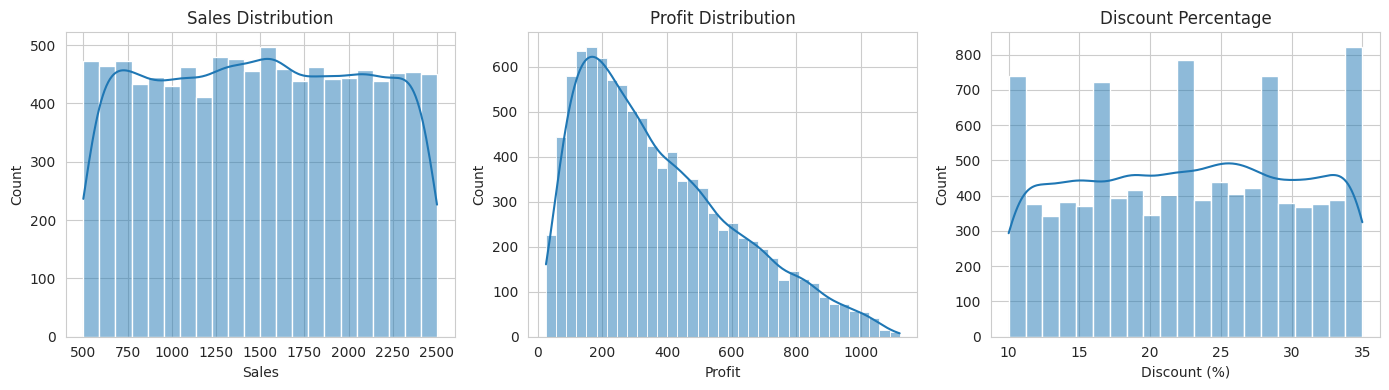

In [132]:
# 2) Univariate distributions for numeric columns
plt.figure(figsize=(14,4))

# Sales distribution
plt.subplot(1,3,1)
sns.histplot(df['sales'], kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')

# Profit distribution
plt.subplot(1,3,2)
sns.histplot(df['profit'], kde=True)
plt.title('Profit Distribution')
plt.xlabel('Profit')

# Discount distribution (%)
plt.subplot(1,3,3)
sns.histplot(df['discount_percent'], kde=True)
plt.title('Discount Percentage')
plt.xlabel('Discount (%)')

plt.tight_layout()

**Profit distribution** - Profit is right-skewed, meaning most orders give small profits and only a few give very high profit.

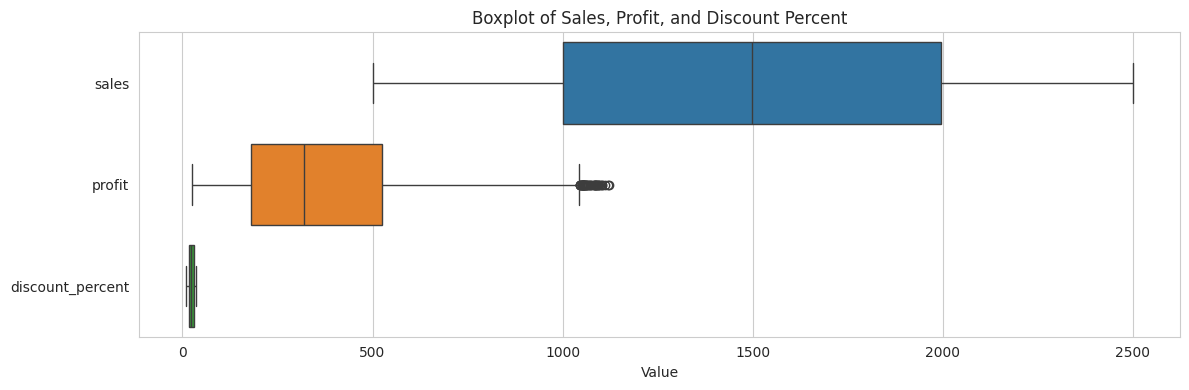

In [133]:
# Boxplot for numeric variables to detect outliers
plt.figure(figsize=(12,4))
sns.boxplot(data=df[['sales','profit','discount_percent']], orient='h')
plt.title('Boxplot of Sales, Profit, and Discount Percent')
plt.xlabel('Value')
plt.tight_layout()
plt.show()

Profit has clear outliers, while sales just varies widely and discount percent stays in a tight range.

In [134]:
# Create log-transformed profit column to reduce skewness
df['log_profit'] = np.log1p(df['profit'])

# Preview the new column
df['log_profit'].head()

,log_profit
0,5.997148
1,5.015954
2,5.113192
3,4.506454
4,6.823776


In [135]:
# EDA: Top categories by frequency
df['category'].value_counts().head(10)

,count
category,
Snacks,1514
"Eggs, Meat & Fish",1490
Fruits & Veggies,1418
Bakery,1413
Beverages,1400
Food Grains,1398
Oil & Masala,1361


In [136]:
# EDA: Top 10 most frequent sub-categories
df['sub_category'].value_counts().head(10)

,count
sub_category,
Health Drinks,719
Soft Drinks,681
Cookies,520
Breads & Buns,502
Chocolates,499
Noodles,495
Masalas,463
Biscuits,459
Cakes,452


In [137]:
# EDA: Top 10 cities by number of orders
df['city'].value_counts().head(10)

,count
city,
Kanyakumari,459
Tirunelveli,446
Bodi,442
Krishnagiri,440
Vellore,435
Perambalur,434
Tenkasi,432
Chennai,432
Salem,431


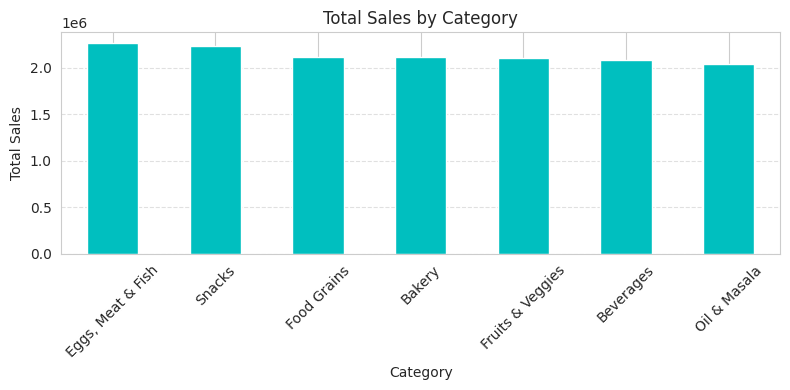

In [138]:
# EDA: Total sales by category
sales_by_cat = (df.groupby('category')['sales'].sum().sort_values(ascending=False))

plt.figure(figsize=(8,4))
sales_by_cat.plot(kind='bar', color='c')

plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

All categories have similar sales levels, with Eggs, Meat & Fish and Snacks slightly ahead.

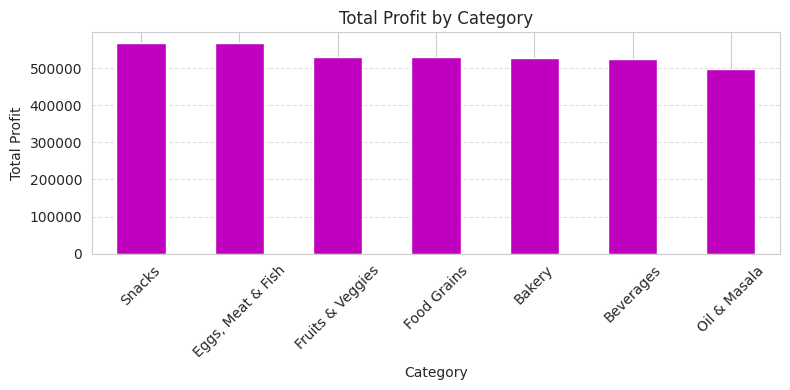

In [139]:
# EDA: Total profit by category
profit_by_cat = (df.groupby('category')['profit'].sum().sort_values(ascending=False))

plt.figure(figsize=(8,4))
profit_by_cat.plot(kind='bar', color='m')

plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Snacks and Eggs, Meat & Fish give the highest profit, while Oil & Masala gives the lowest.

<Figure size 800x400 with 0 Axes>

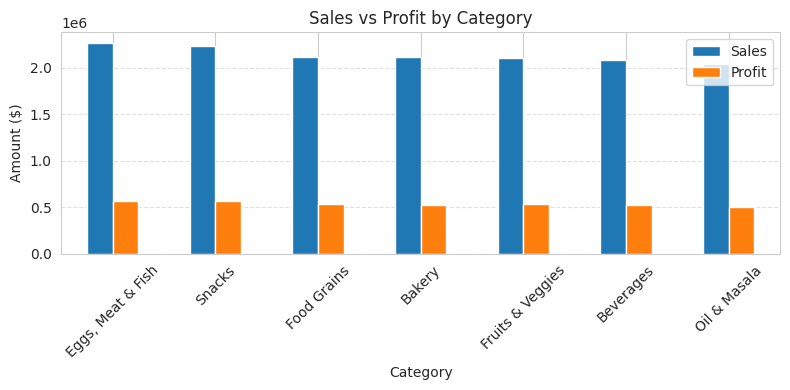

In [140]:
# EDA: Sales vs Profit by Category
category_summary = (df.groupby('category')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False))

plt.figure(figsize=(8,4))
category_summary.plot(kind='bar', figsize=(8,4))

plt.title('Sales vs Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.legend(['Sales','Profit'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Categories with higher sales also have higher profit.

In [141]:
# Time series overview: monthly sales trend
monthly = (df.groupby('order_month_year')['sales'].sum().reset_index())

# Convert to datetime for proper time-series plotting
monthly['order_month_year'] = pd.to_datetime(monthly['order_month_year'])

# Verify data types
monthly.dtypes

,0
order_month_year,datetime64[ns]
sales,float64


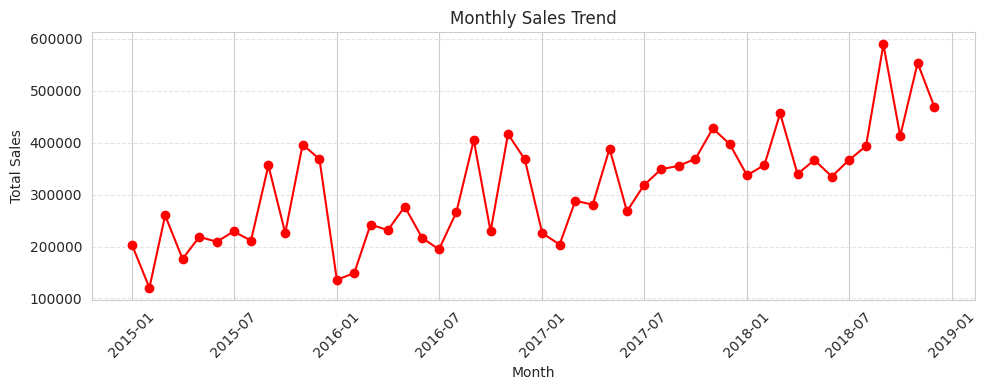

In [143]:
# Monthly sales trend visualization
plt.figure(figsize=(10,4))
plt.plot(monthly['order_month_year'],monthly['sales'],marker='o',color='red',linestyle='-',)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Sales keep increasing from 2015 to 2018, with some months showing higher spikes. This shows steady growth and some seasonal demand.

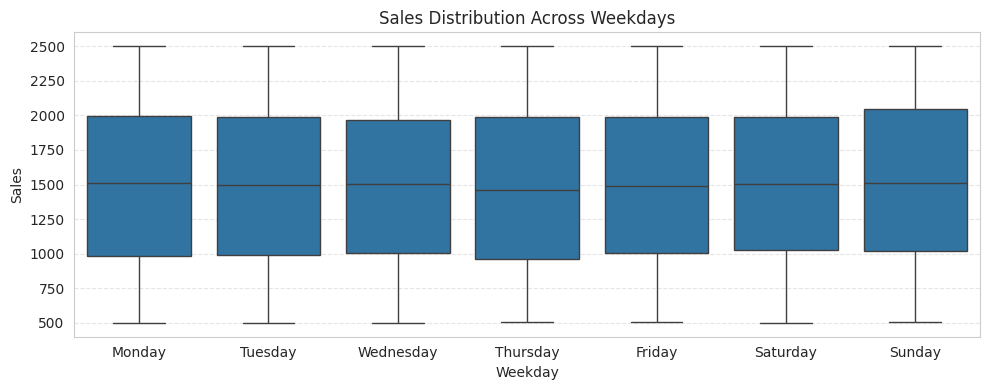

In [144]:
# Sales distribution by weekday
plt.figure(figsize=(10,4))
sns.boxplot(x='weekday',y='sales',data=df,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.title('Sales Distribution Across Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Sales')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Sales stay almost the same on all weekdays, with no big difference between days.

**Monthly Trend**

Sales go up each year, with some months showing higher peaks.

**Weekday Pattern**

Sales stay steady on all weekdays, with a slight rise on weekends.

**Conclusion**

The store shows steady growth and stable daily buying, which means good customer demand.

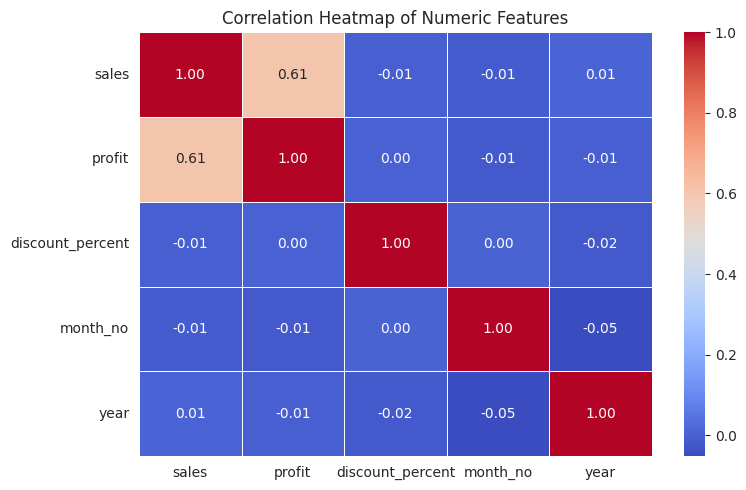

In [145]:
# Correlation heatmap for numeric features
plt.figure(figsize=(8,5))
numeric = df[['sales','profit','discount_percent','month_no','year']]
correlation_matrix = numeric.corr()

sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)

plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

Sales and profit have a moderate positive link, while other numeric columns show almost no connection.

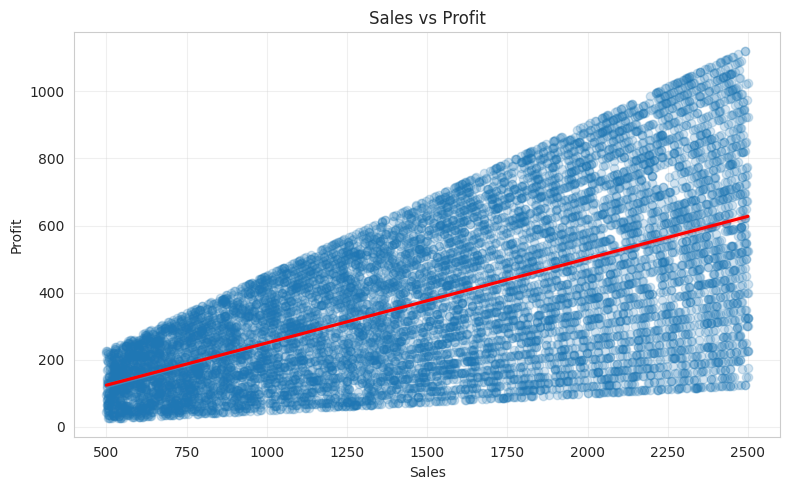

In [146]:
# Bivariate analysis: Relationship between sales and profit
plt.figure(figsize=(8,5))
sns.regplot(x='sales',y='profit',data=df,scatter_kws={'alpha':0.2},line_kws={'color':'red'})

plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Profit increases as sales increase, showing a clear positive relationship.

In [147]:
# Check if any sales value is zero (important before calculating profit margin)
(df['sales'] == 0).sum()

np.int64(0)

In [148]:
# Calculate profit margin percentage
df['profit_margin'] = (df['profit'] / df['sales']) * 100

# Preview the new column
df['profit_margin'].head()

,profit_margin
0,32.0
1,20.0
2,7.0
3,10.0
4,39.0


In [149]:
# Average profit margin (%) by category
profit_margin_by_cat = (df.groupby('category')['profit_margin'].mean().sort_values(ascending=False))

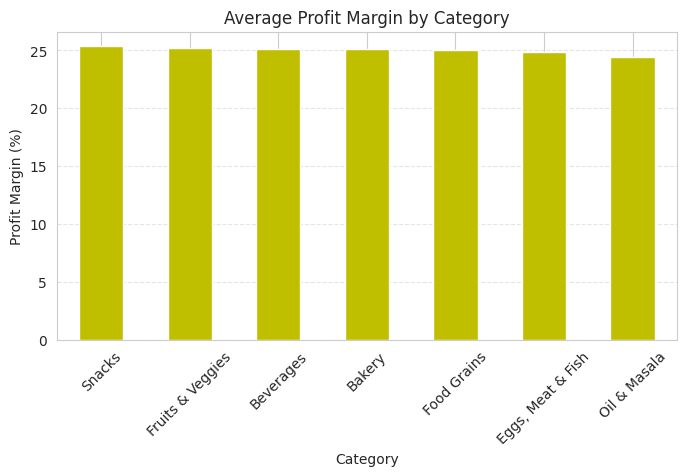

In [150]:
# Bar chart: Average profit margin by category
plt.figure(figsize=(8,4))
profit_margin_by_cat.plot(kind='bar', color='y')

plt.title('Average Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# plt.tight_layout()
plt.show()

All categories have similar profit margins, with Snacks slightly higher and Oil & Masala slightly lower

In [152]:
# Average profit margin and discount percentage by category
profit_discount_by_cat = (df.groupby('category')[['profit_margin', 'discount_percent']].mean().sort_values('profit_margin', ascending=False))


<Figure size 800x600 with 0 Axes>

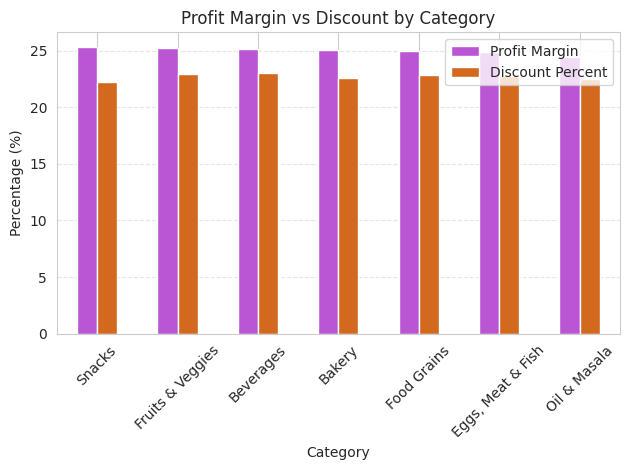

In [153]:
# Bar chart: Profit margin vs discount percentage by category
plt.figure(figsize=(8,6))
profit_discount_by_cat.plot(kind='bar',color=['mediumorchid', 'chocolate'])

plt.title('Profit Margin vs Discount by Category')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.legend(['Profit Margin', 'Discount Percent'], loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Profit margin and discount percent stay close across categories, showing a balanced pricing strategy.

In [154]:
# Top 10 cities by total sales and profit
top_city = (df.groupby('city')[['sales', 'profit']].sum().sort_values('sales', ascending=False).head(10))
top_city

,sales,profit
city,,
Kanyakumari,706764.0,172217.74
Vellore,676550.0,174073.01
Bodi,667177.0,173655.13
Tirunelveli,659812.0,165169.01
Perambalur,659738.0,171132.19
Salem,657093.0,160899.30
Pudukottai,653179.0,164072.63
Tenkasi,643652.0,156230.72
Karur,642273.0,169305.94


<Figure size 1000x400 with 0 Axes>

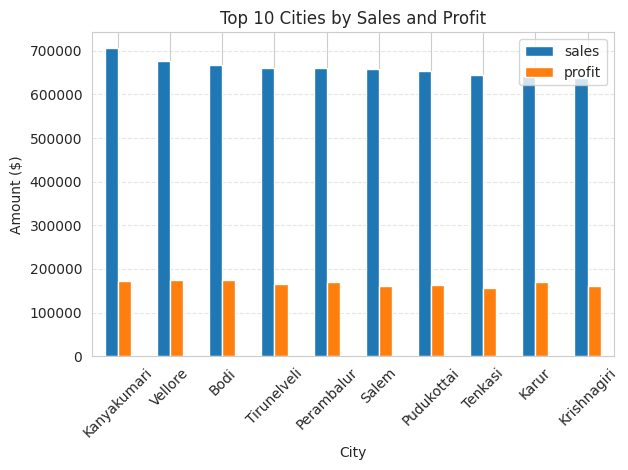

In [155]:
# Bar chart: Top 10 cities by sales and profit
plt.figure(figsize=(10,4))
top_city.plot(kind='bar')

plt.title('Top 10 Cities by Sales and Profit')
plt.xlabel('City')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

Kanyakumari leads in both sales and profit, while the other top cities show similar performance levels.

In [156]:
# Compute monthly total sales
monthly_sales = (df.groupby('order_month_year')['sales'].sum().reset_index())
monthly_sales.head()

,order_month_year,sales
0,2015-01,203014.0
1,2015-02,120444.0
2,2015-03,260072.0
3,2015-04,176187.0
4,2015-05,218740.0


In [157]:
# Actual monthly sales
monthly_sales['order_month_year'] = pd.to_datetime(monthly_sales['order_month_year'])

In [158]:
# Rolling average (smoother trend)
monthly_sales['rolling_avg'] = monthly_sales['sales'].rolling(window=3).mean()

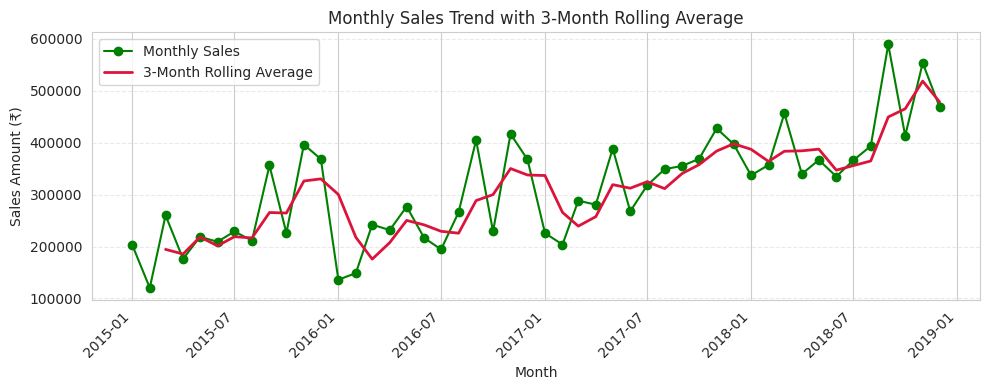

In [160]:
# Monthly sales trend with rolling average
plt.figure(figsize=(10,4))

plt.plot(monthly_sales['order_month_year'],monthly_sales['sales'],marker='o',color='green',label='Monthly Sales')
plt.plot(monthly_sales['order_month_year'],monthly_sales['rolling_avg'],color='crimson',linewidth=2,label='3-Month Rolling Average')

plt.title('Monthly Sales Trend with 3-Month Rolling Average')
plt.xlabel('Month')
plt.ylabel('Sales Amount (₹)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

The rolling average shows a clear upward sales trend and smooths out monthly ups and downs.

In [161]:
# grouped_df = df.groupby(['category','month'])['sales'].sum().reset_index()
# sales_pivot = grouped_df.pivot(index='category', columns='month', values='sales')

# Create a pivot table of total sales for each (Category × Month) to prepare data for the heatmap
sales_pivot = df.pivot_table(index='category',columns='month',values='sales',aggfunc='sum',fill_value=0)

In [162]:
# Quick summary stats for sales
df['sales'].describe()

,sales
count,9994.000000
mean,1496.596158
std,577.559036
min,500.000000
25%,1000.000000
50%,1498.000000
75%,1994.750000
max,2500.000000


In [163]:
# Arrange months in correct order
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

sales_pivot = sales_pivot[month_order]

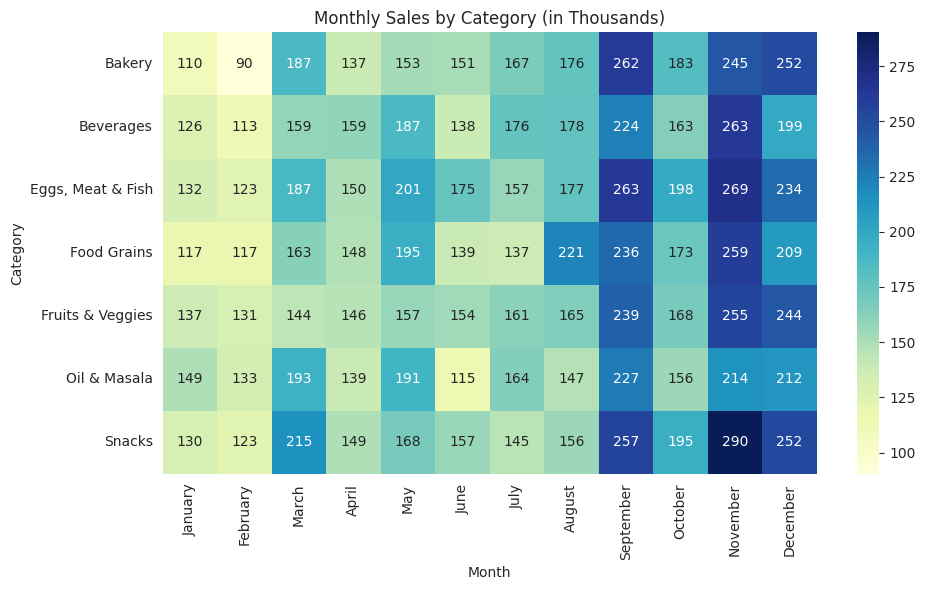

In [164]:
# Heatmap of monthly sales by category (in thousands)
plt.figure(figsize=(10,6))
sns.heatmap(sales_pivot/1000,cmap='YlGnBu',annot=True,fmt='.0f')
plt.title('Monthly Sales by Category (in Thousands)')
plt.xlabel('Month')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

Sales rise across all categories toward the end of the year, especially in September to December.

In [166]:
# Total sales by customer sorted highest to lowest
sales_by_customer = df.groupby('customer_name')['sales'].sum().sort_values(ascending = False)

In [167]:
# Cumulative percent of customer sales for Pareto analysis
cumulative_percent = (sales_by_customer.cumsum() / sales_by_customer.sum()) * 100
cumulative_percent

,sales
customer_name,
Krithika,2.235484
Amrish,4.464216
Verma,6.681675
Arutra,8.859388
Vidya,11.010878
Vinne,13.147438
Shah,15.277467
Suresh,17.390012
Adavan,19.498332


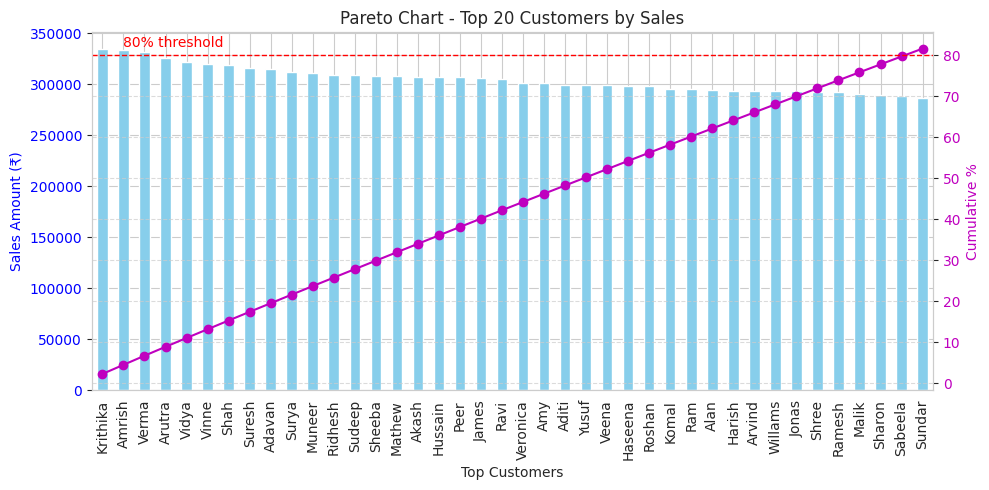

In [168]:
# Pareto chart: top customers with sales bars and cumulative percentage line

fig, ax1 = plt.subplots(figsize=(10,5))
# fig = plt.figure(figsize=(10,5))
# ax1 = fig.add_subplot(1,1,1)

# Bar chart for sales
sales_by_customer.head(40).plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_ylabel('Sales Amount (₹)', color='blue')
ax1.set_xlabel('Top Customers')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(cumulative_percent.head(40).values, color='m', marker='o', linestyle='-')
ax2.set_ylabel('Cumulative %', color='m')
ax2.tick_params(axis='y', labelcolor='m')

# Highlight the 80% line
ax2.axhline(y=80, color='red', linestyle='--', linewidth=1)
ax2.text(1, 82, '80% threshold', color='red', fontsize=10)

plt.title('Pareto Chart - Top 20 Customers by Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The top 20 customers together make up the majority of total sales.

In [169]:
# Calculate and print main business KPIs
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
avg_profit_margin = (df['profit'].sum() / df['sales'].sum()) * 100
total_orders = df['order_id'].nunique()
unique_customers = df['customer_name'].nunique()

print("Supermart Grocery Sales KPIs")
print("--------------------------------")
print(f"Total Sales: ₹{total_sales:,.2f}")
print(f"Total Profit: ₹{total_profit:,.2f}")
print(f"Average Profit Margin: {avg_profit_margin:.2f}%")
print(f"Total Orders: {total_orders}")
print(f"Unique Customers: {unique_customers}")

Supermart Grocery Sales KPIs
--------------------------------
Total Sales: ₹14,956,982.00
Total Profit: ₹3,747,121.20
Average Profit Margin: 25.05%
Total Orders: 9994
Unique Customers: 50


Total Sales → shows how much money the business made in total.

Total Profit → shows how much money the business actually kept after costs.

Profit Margin → shows how much profit is earned for every ₹100 of sales.

Total Orders → shows how many orders customers placed.

Unique Customers → shows how many different customers bought something.

# Machine Learning

In [171]:
# Import ML tools for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

We are building a Linear Regression model to predict profit from sales.

Input (X) is sales, and

output (y) is profit.

In [172]:
# Define input (sales) and target (log profit) for the model
X = df[['sales']]
Y = df['log_profit']

In [173]:
# Split data into train and test sets (80% train, 20% test)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [174]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [175]:
# Predict log profit and convert both predictions and actuals back to normal scale
y_pred_log = model.predict(x_test)
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test)

In [176]:
# Print model performance scores
print("R2 Score :",r2_score(y_actual,y_pred))
print("Mean Absolute Error :",mean_absolute_error(y_actual,y_pred))
print("Mean Squared Error :",mean_squared_error(y_actual,y_pred))

R2 Score : 0.30451703485774906
Mean Absolute Error : 162.77488066497904
Mean Squared Error : 41540.987283151124


The model explains only 30% of the profit pattern.

This means sales alone is not enough to predict profit correctly.

Error is high because profit also depends on other things like discount and product type.

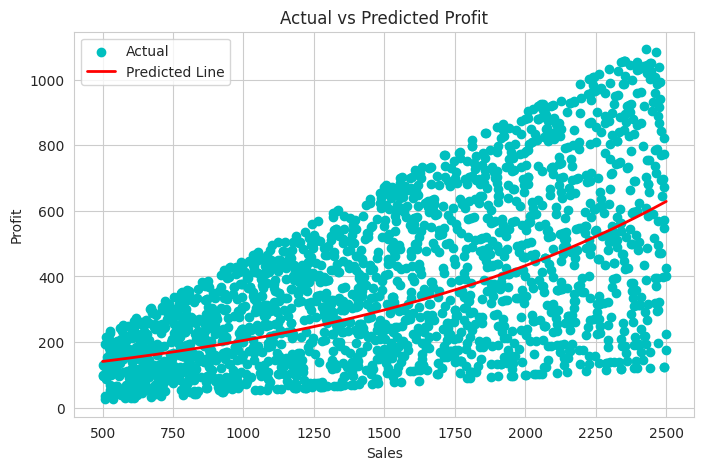

In [177]:
# Plot actual vs predicted profit with a sorted prediction line

sorted_df = pd.DataFrame({'sales':x_test.values.flatten(),'predicted':y_pred})
sorted_df = sorted_df.sort_values(by='sales')

plt.figure(figsize=(8,5))
plt.scatter(x_test,y_actual,color='c',label='Actual')
plt.plot(sorted_df['sales'],sorted_df['predicted'],color='red',label='Predicted Line',linewidth=2)
plt.title('Actual vs Predicted Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.show()

Most of the actual profit points are far away from the predicted line, which means the model is not capturing the real profit pattern well.

This shows profit depends on more factors, and a simple model cannot predict it accurately.

In [178]:
# Pick sales, discount, and category as inputs for the second model
X1 = df[['sales','discount_percent','category']]
Y1 = df['log_profit']

In [179]:
# Convert category into numeric dummy columns for model use
X1 = pd.get_dummies(X1,columns=['category'])
X1

,sales,discount_percent,category_Bakery,category_Beverages,"category_Eggs, Meat & Fish",category_Food Grains,category_Fruits & Veggies,category_Oil & Masala,category_Snacks
0,1254.0,12.0,False,False,False,False,False,True,False
1,749.0,18.0,False,True,False,False,False,False,False
2,2360.0,21.0,False,False,False,True,False,False,False
3,896.0,25.0,False,False,False,False,True,False,False
4,2355.0,26.0,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9989,945.0,16.0,False,False,True,False,False,False,False
9990,1195.0,26.0,True,False,False,False,False,False,False
9991,1567.0,16.0,False,False,False,True,False,False,False
9992,1659.0,15.0,False,False,False,False,False,True,False


We drop one dummy column because the model can figure it out from the remaining ones — keeping things clean and simple.

In [180]:
# Split data for the second model (80% train, 20% test)
x_train1,x_test1,y_train1,y_test1 = train_test_split(X1,Y1,test_size=0.2,random_state=42)

In [181]:
# Train the second linear regression model
model = LinearRegression()
model.fit(x_train1, y_train1)

LinearRegression()

In [182]:
# Predict log profit and convert predictions and actuals back to normal profit
y_pred1_log = model.predict(x_test1)
y_pred1 = np.expm1(y_pred1_log)
y_actual1 = np.expm1(y_test1)

In [183]:
# Evaluate model performance using actual profit values
print('R2 Score :',r2_score(y_actual1,y_pred1))
print('MAE :',mean_absolute_error(y_actual1,y_pred1))
print('MSE :',mean_squared_error(y_actual1,y_pred1))

R2 Score : 0.30569533974034535
MAE : 162.52559266452036
MSE : 41470.60748868183


This model performs almost the same as the first one.

Adding discount and category did not improve accuracy much.

This means the relationship between profit and these columns is not linear.

Both models perform almost the same (around 30% accuracy).
This shows that profit has a more complex (non-linear) relationship that linear regression cannot capture.

In [184]:
# Import Random Forest regressor and evaluation metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [185]:
# Train the Random Forest model with 100 trees
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train1,y_train1)

RandomForestRegressor(random_state=42)

In [186]:
# Convert Random Forest log predictions and actuals back to normal profit
y_pred_rf_log = rf_model.predict(x_test1)
y_pred_rf = np.expm1(y_pred_rf_log)
y_actual_rf = np.expm1(y_test1)

In [187]:
# Evaluate Random Forest model performance using actual profit
print("R2 Score:", r2_score(y_actual_rf, y_pred_rf))
print("MAE:", mean_absolute_error(y_actual_rf, y_pred_rf))
print("MSE:", mean_squared_error(y_actual_rf, y_pred_rf))

R2 Score: 0.20660637878239207
MAE: 170.7791042525016
MSE: 47389.16117491493


Random Forest did not perform better than linear models — profit is not easy to predict from the available columns.

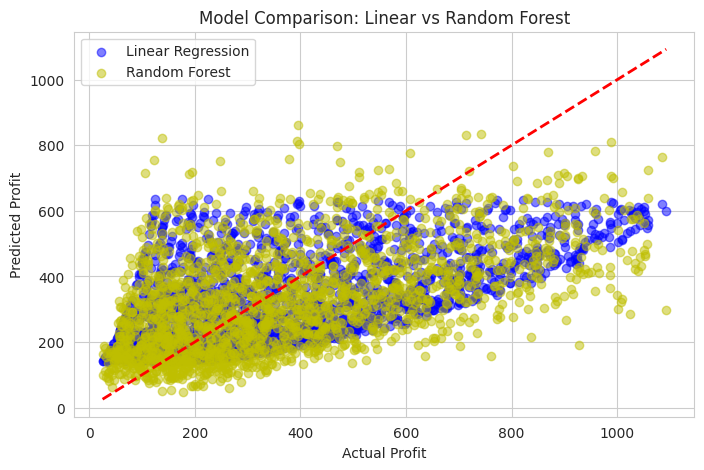

In [188]:
# Scatter plot comparing actual vs predicted profit for both models

plt.figure(figsize=(8,5))
plt.scatter(y_actual1, y_pred1, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(y_actual1, y_pred_rf, color='y', alpha=0.5, label='Random Forest')
plt.plot([y_actual1.min(), y_actual1.max()], [y_actual1.min(), y_actual1.max()], 'r--', lw=2)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Model Comparison: Linear vs Random Forest')
plt.legend()
plt.show()

Both models do not fit the data well, as most points fall far from the perfect prediction line.

Random Forest predictions spread wider, while Linear Regression stays more grouped, but neither captures the true profit pattern.

Both models also underpredict higher profit values, showing they miss the real growth trend.

This suggests profit depends on other hidden factors not present in the dataset, making it difficult for these models to predict accurately.

In [189]:
# Save the cleaned dataset to a CSV file
df.to_csv('cleaned_supermart_data.csv',index=False)